### Explore the Network analysis of items 

In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random


# funtion to add nodes and weightet edges to nodes
def complete_graph(graph,orderids,items):
    for i in range(len(orderids) - 1):
        start = i+1
        for j in range(start, len(orderids) - 1):
            node1 = items[i]
            node2 = items[j]
            if orderids[i] == orderids[j]:
                if node1 in X:
                    if graph.has_edge(node1,node2):
                        weight = graph[node1][node2]['weight']
                        graph[node1][node2]['weight'] = weight + 1
                    else:
                        graph.add_edge(node1,node2,weight = 1)   
                else:
                    graph.add_edge(node1,node2,weight = 1)
            graph.add_node(node1)   
    return graph

# function to find the specific node with more than number of edges
def nodes_with_m_nbrs(G, m):
    nodes = set()
    for n in G.nodes():
        if len(list(G.neighbors(n))) > m:
            nodes.add(n)
    return nodes


# function to find if the path exists between 2 nodes
def path_exists(G, node1, node2):
    visited_nodes = set()
    queue = [node1]
    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            return False

# function to recommend randomly based on the neighbor nodes
def recommend_addon_randomly(foodname):
    if foodname in X:
        options = list(X.neighbors(foodname))
        print('Number of available options are:',len(options))
        if len(options) > 0:
            return random.choice(options)
        else:
            return 'Oops no adds on!'
    else:
        return 'node not found!'    

# function to recommend based on the top weighted neighbor nodes
def recommend_top_addon(foodname):
    if foodname in X:
        options = list(X.neighbors(foodname))
        options_number = len(options)
        print('total found: ',options_number)
       
        if len(options) > 0:
            edges = sorted(X.edges(foodname,data=True), key= lambda x:x[2].get('weight'), reverse=True)
           
            for i in range(options_number):
                top_ordered_together = edges[i][1]
                top_ordered_count= edges[i][2]['weight']
                print(str(i+1),':',top_ordered_together,'(',top_ordered_count,')')
        else:
            return 'Oops no adds on!'
    else:
        return 'node not found!'        



### Load data

In [4]:
orders = pd.read_csv('../data/full_data.csv',low_memory=False)
orders.columns = [c.lower() for c in orders.columns]
orders.head(3)

,orderid,userid,restaurantid,date,rating,comments,address,count,itemid,price,viewcount,name,description,searchvector,type
0,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,211,15.0,0.0,Tableside Spinach Salad,NaN,'almond':8 'babi':4 'bacon':11 'jack':10 'mont...,Main
1,8,113,110,2020-03-28 08:15:25.615002,NaN,NaN,"{'Id': 4, 'Lat': 49.28319399999999, 'Lng': -12...",1,218,27.0,0.0,King Crab,NaN,'blanc':9 'buerr':8 'caper':7 'char':3 'chilli...,Main
2,293,4,121,2020-05-13 01:20:59.267256,NaN,NaN,NaN,1,440,14.0,1097.0,Joojeh Kabab With Rice,One skewer of chicken breast marinated with yo...,'bbq':14 'chicken':11 'joojeh':1 'juic':9 'kab...,Main


#### Lets add items ass nodes, add edges between orders that ordered together and also add wieght to the edge equal to the number of times they ordered together

In [7]:
orderids = list(orders.orderid.values)
items = list(orders.name.values)
X = nx.Graph(data = True)

X = complete_graph(X,orderids,items)


Lets explore the top 10 foods ordered the most together

In [17]:
top_weighted = sorted(X.edges(data=True), key=lambda t: t[2].get('weight'),reverse=True)[:10]
top_weighted

[('Shoestring Fries (G)', 'Crispy Free Run Chicken Sandwich', {'weight': 621}),
 ('Shoestring Fries (G)',
  'Grass Fed Bc Beef Cheesburger (4oz)',
  {'weight': 520}),
 ('Shoestring Fries (G)', 'Hammer Hot Chicken', {'weight': 354}),
 ('Shoestring Fries (G)',
  'Grass Fed BC Double Cheeseburger (8oz)',
  {'weight': 310}),
 ('Joojeh Kabab With Rice', 'Koobideh Kabab With Rice', {'weight': 232}),
 ('Shoestring Fries (G)', 'Crispy Fish Sandwich', {'weight': 220}),
 ('Crispy Free Run Chicken Sandwich',
  'Grass Fed Bc Beef Cheesburger (4oz)',
  {'weight': 202}),
 ('Shoestring Fries (G)', 'Coca Cola', {'weight': 201}),
 ('Shoestring Fries (G)', 'East Coast Lobster Roll', {'weight': 179}),
 ('Shoestring Fries (G)', 'House Made Falafel Sandwich (ve)', {'weight': 176})]

### Plot the Graph

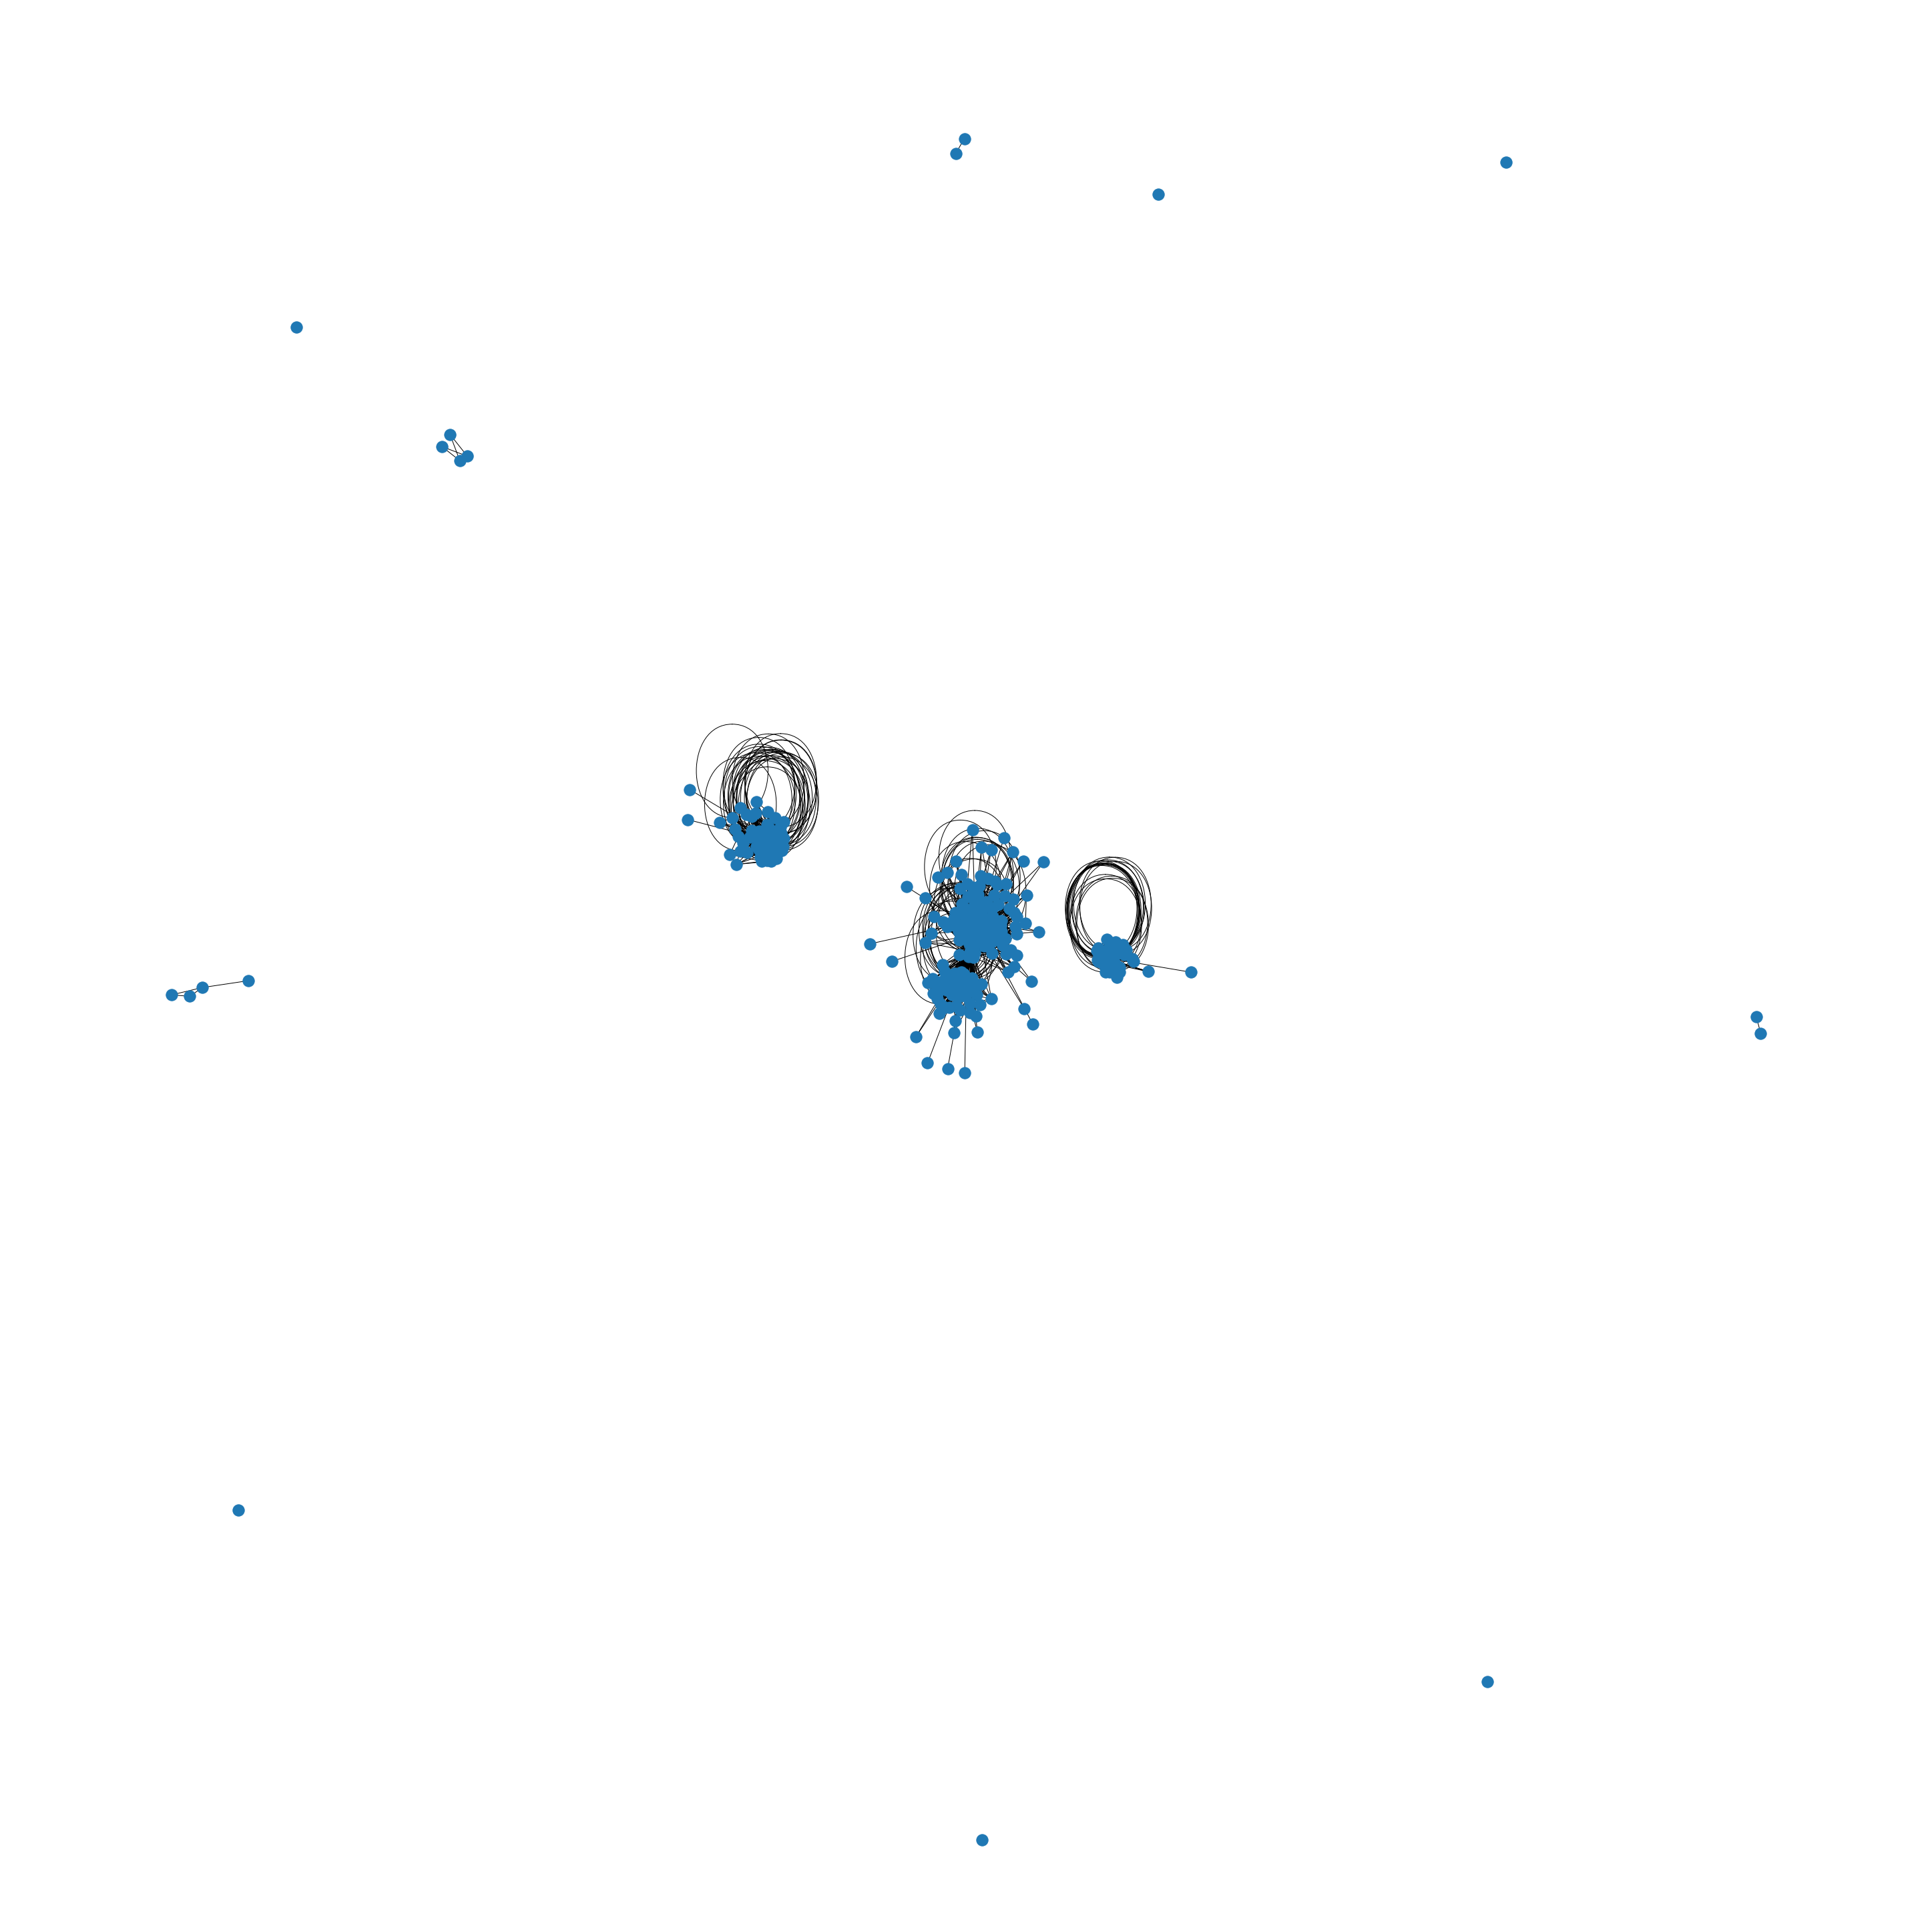

In [18]:
plt.figure(figsize = (40,40))
nx.draw(X)
plt.show()

Lets find out which top 10 node has the most number of neighbours 

In [56]:
nodes_degrees = [(n,len(list(X.neighbors(n)))) for n in X.nodes()]
nodes_degrees.sort(key = lambda x:x[1], reverse=True)
nodes_degrees[:10]

[('Koobideh Kabab With Rice', 93),
 ('Kashk Bademjan', 92),
 ('Skewer Of Koobideh Kabob', 77),
 ('Shirazi Salad', 76),
 ('Joojeh Kabab With Rice', 69),
 ('Guacamole ', 57),
 ('Azteca Soup', 56),
 ('Extra Bread', 55),
 ('Shoestring Fries (G)', 55),
 ('Nachos', 55)]

Lets explore if the path exists between arbitrary nodes

In [57]:
food1 = random.choice(items)
food2 = random.choice(items)
print('food1: ',food1,'\nfood2:',food2)
path_exists(X, food1, food2)

food1:  Coca Cola 
food2: Joojeh Kabab With Rice
Path does not exist between nodes Coca Cola and Joojeh Kabab With Rice


False

### Lets recommend adds on based on the neighbours

In [67]:
food = random.choice(items)
print('food: ',food)

recommend_addon_randomly(food)

food:  Chicken Wings (10 Pcs)
Number of available options are: 29


'Chenjeh Kabob With Rice'

## Lets recommend one adds on based on top wighted neighbours

In [88]:
food = random.choice(items)
print('food: ',food)
recommend_top_addon(food)

food:  Popcorn Chicken
total found:  24
1 : HH Shoestring Fries ( 44 )
2 : Lager Hoi Polloi ( 22 )
3 : HH Crispy Chicken Sandwich ( 16 )
4 : HH Cheese Burger ( 15 )
5 : Gin & Tonic ( 12 )
6 : Pino Gris White 5oz ( 11 )
7 : Vodka Soda ( 8 )
8 : Root Beer ( 6 )
9 : Coca Cola ( 6 )
10 : Gin & Soda ( 6 )
11 : Rum & Coke ( 5 )
12 : Merlot Red 5oz ( 5 )
13 : Hammer Hot Chicken ( 5 )
14 : Sparkling Water ( 4 )
15 : Fish And Chips (G) ( 4 )
16 : Ginger Ale ( 4 )
17 : Clam Chowder ( 4 )
18 : Popina Bottled Water ( 3 )
19 : Shoestring Fries (G) ( 2 )
20 : East Coast Lobster Roll ( 2 )
21 : HH Falafel Sandwich ( 1 )
22 : Powell Street, Ode to Citra  (473 Ml) ( 1 )
23 : Hoi Polloi Lager ( 1 )
24 : Grass Fed BC Double Cheeseburger (8oz) ( 1 )
